# Лабораторная работа 5. Математическое моделирование в Python. Решение ОДУ. Визуализация данных.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import minimize, rosen, shgo
from scipy.integrate import odeint

## 1. Библиотека Matplotlib (3D-графика) и SciPy (оптимизация)
Основные функции:
plot_wireframe(X, Y, Z, ...) – каркасная поверхность.

X, Y, Z – 2D-массивы координат (обычно создаются meshgrid).

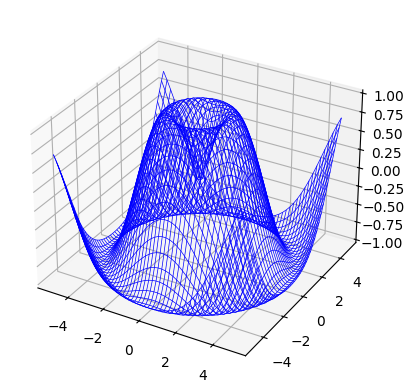

In [2]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, color='blue', linewidth=0.5)
plt.show()

plot_surface(X, Y, Z, cmap=..., alpha=...) – залитая поверхность.
- cmap – цветовая карта (например, 'viridis').
- alpha – прозрачность (от 0 до 1).

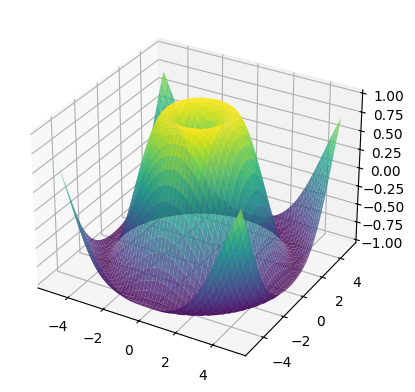

In [3]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
plt.show()

plot_trisurf(x, y, z, ...) – поверхность по нерегулярной сетке.\
Принимает 1D-массивы (удобно для неравномерных данных).

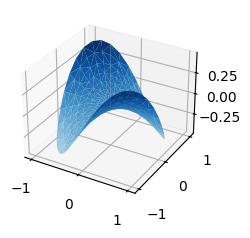

In [4]:
plt.style.use('_mpl-gallery')

n_radii = 8
n_angles = 36


radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())
z = np.sin(-x*y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_trisurf(x, y, z, vmin=z.min() * 2, cmap=cm.Blues)

plt.show()

contour(X, Y, Z, levels=...) – линии уровня (2D).\
contourf(X, Y, Z, levels=...) – залитые области уровня (2D).

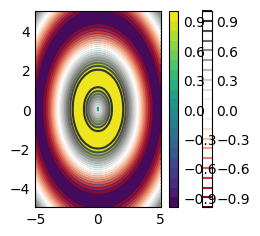

In [5]:
plt.contour(X, Y, Z, levels=20, cmap='RdGy')
plt.colorbar()
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()

np.meshgrid(x, y) – создаёт 2D-сетку координат из 1D-массивов. \
примеры были

scipy.optimize.minimize(fun, x0, method=..., bounds=...)\
fun – минимизируемая функция (должна возвращать скаляр). \
x0 – начальное приближение.\
method – метод оптимизации ('Nelder-Mead', 'BFGS', 'SLSQP' и др.).\
bounds – ограничения - границы (например, bounds=[(0, 1), (-1, 1)]).\
constraints - тоже ограничения, но другого рода - по функции, неравенству итд.

In [6]:
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds,
               constraints=cons)
res.x #результат равен 1.4, 1.7

array([1.4, 1.7])

scipy.optimize.shgo(fun, bounds, ...) – глобальная оптимизация (Stochastic Hill Climbing).
bounds – границы поиска ([(x_min, x_max), (y_min, y_max)]).

Подходит для задач с множеством локальных минимумов.

In [7]:
bounds = [(0,2), (0, 2), (0, 2), (0, 2), (0, 2)]
result = shgo(rosen, bounds)
result.x, result.fun

(array([1., 1., 1., 1., 1.]), np.float64(2.920392374190081e-18))

## 2. Построить трёхмерные и контурные графики функций

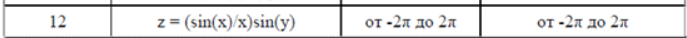

Ввести исходные данные.\
Вычислить функцию.\
Вывести в одном окне, но на разных графиках (см. subplot), функцию в виде 5 трехмерных графиков разного типа: mesh, meshc, plot3, surf, surfl.\
Вывести в одном окне, но на разных графиках (см. subplot), функцию в виде 2 контурных графиков разного типа: contour, contourf.\
Пояснение для заданий 3,4. Поверхностный и контурный графики. Для формирования поверхностного или контурного графика необходимо:

задать сетку по координатам X и Y,
вычислить функцию Z=f (X,Y),
ввести номер графического окна, вывести туда график выбранного типа:
- трехмерный с аксонометрией, функция plot3(X,Y,Z),
- трехмерный с функциональной окраской, функция mesh (X,Y,Z),
- трехмерный с функциональной окраской и проекцией, функция meshc (X,Y,Z),
- трехмерный с функциональной окраской и проекцией, функция surf (X,Y,Z),
- контурный, функция contour (X,Y,Z),
- объемный контурный, функция contour3 (X,Y,Z),
- трехмерный с освещением, функция surfl (X,Y,Z).\
спасибо за гуглинг матлабовских функций

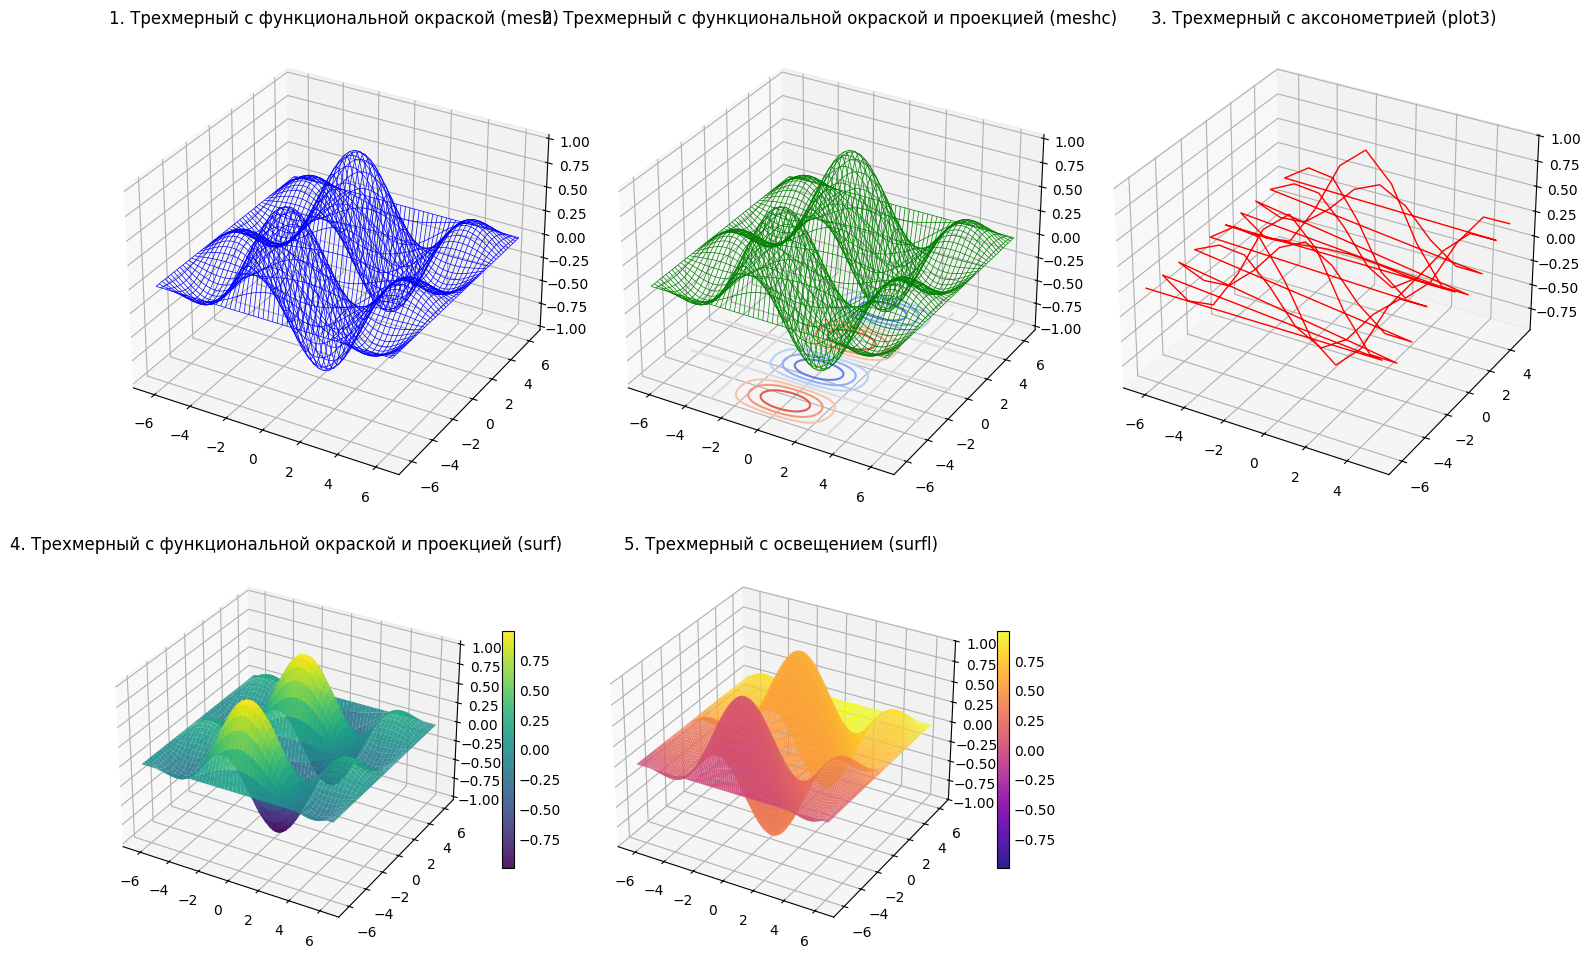

In [8]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)/X * np.sin(Y)

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(231, projection='3d')
ax1.plot_wireframe(X, Y, Z, color='blue', linewidth=0.5)
ax1.set_title('1. Трехмерный с функциональной окраской (mesh)')

ax2 = fig.add_subplot(232, projection='3d')
ax2.plot_wireframe(X, Y, Z, color='green', linewidth=0.5)
ax2.contour(X, Y, Z, zdir='z', offset=-1, cmap='coolwarm') 
ax2.set_title('2. Трехмерный с функциональной окраской и проекцией (meshc)')

ax3 = fig.add_subplot(233, projection='3d')
ax3.plot(X[::10, ::10].flatten(), Y[::10, ::10].flatten(), Z[::10, ::10].flatten(), 'r-', linewidth=1) # Каждая десятая точка чтобы было видно происходящее
ax3.set_title('3. Трехмерный с аксонометрией (plot3)')

ax4 = fig.add_subplot(234, projection='3d')
surf = ax4.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)
fig.colorbar(surf, ax=ax4, shrink=0.5)
ax4.set_title('4. Трехмерный с функциональной окраской и проекцией (surf)')

ax5 = fig.add_subplot(235, projection='3d')
surf = ax5.plot_surface(X, Y, Z, cmap='plasma', alpha=0.9, rstride=1, cstride=1)
ax5.set_zlim(-1, 1)
surf.set_array(np.linspace(0, 1, len(surf.get_array())))  # Градиент цвета
fig.colorbar(surf, ax=ax5, shrink=0.5)
ax5.set_title('5. Трехмерный с освещением (surfl)')

plt.tight_layout()
plt.show()

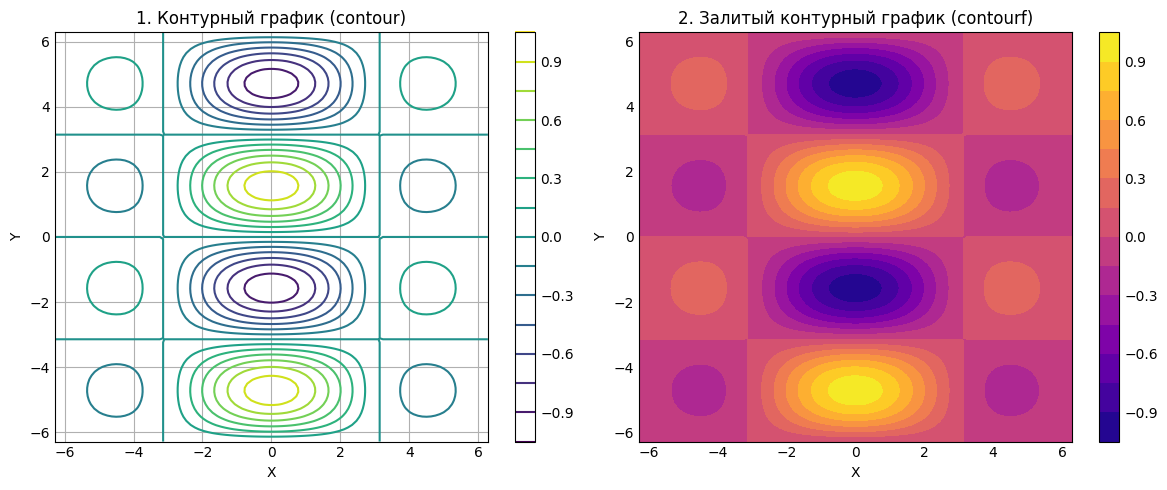

In [9]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)/X * np.sin(Y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

contour_plot = ax1.contour(X, Y, Z, levels=15, cmap='viridis')
ax1.set_title('1. Контурный график (contour)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
fig.colorbar(contour_plot, ax=ax1)  

contourf_plot = ax2.contourf(X, Y, Z, levels=15, cmap='plasma')
ax2.set_title('2. Залитый контурный график (contourf)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(contourf_plot, ax=ax2)  

plt.tight_layout()
plt.show()

## 3. Решите дифференциальное уравнение вида dy / dt = f(x,y)

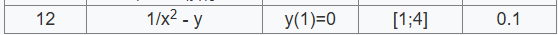

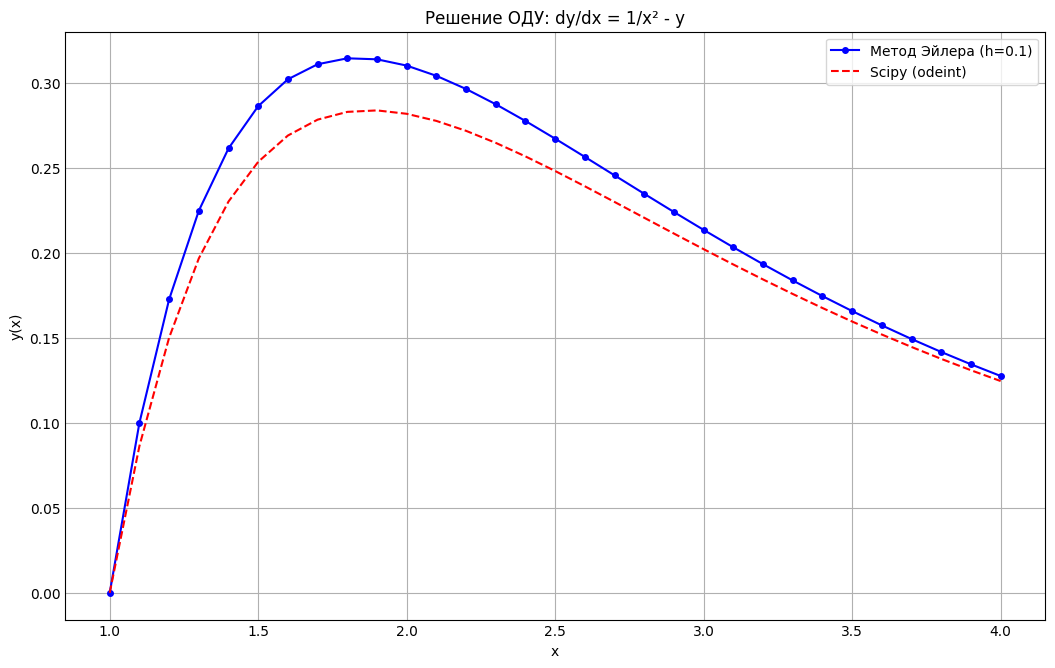

In [10]:
def euler(f, x):
    y = np.zeros(len(x))
    y[0] = 0
    for i in range(1, len(x)):
        y[i] = y[i-1] + 0.1 * f(y[i-1], x[i-1])  # Порядок аргументов y, x
    return y

def f(y, x):
    return (1 / (x**2)) - y
    
x = np.arange(1, 4+0.1, 0.1) 
y0 = 0
y_euler = euler(f, x)

y_odeint = odeint(f, y0, x).flatten()  # .flatten() для преобразования в 1D-массив

plt.figure(figsize=(10, 6))
plt.plot(x, y_euler, 'bo-', label='Метод Эйлера (h=0.1)', markersize=4)
plt.plot(x, y_odeint, 'r--', label='Scipy (odeint)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Решение ОДУ: dy/dx = 1/x² - y')
plt.legend()
plt.grid(True)
plt.show()

## 4.  Составьте модель физической задачи из дифференциальных уравнений


Уравнение колебаний математического маятника:
$ \frac{d^2\theta}{dt^2} + \frac{g}{l}\sin\theta = 0 $
где:
- $\theta(t)$ - угол отклонения от вертикали (рад)
- g - ускорение свободного падения ($9.81\ \text{м/с}^2$)
- l - длина нити (м)




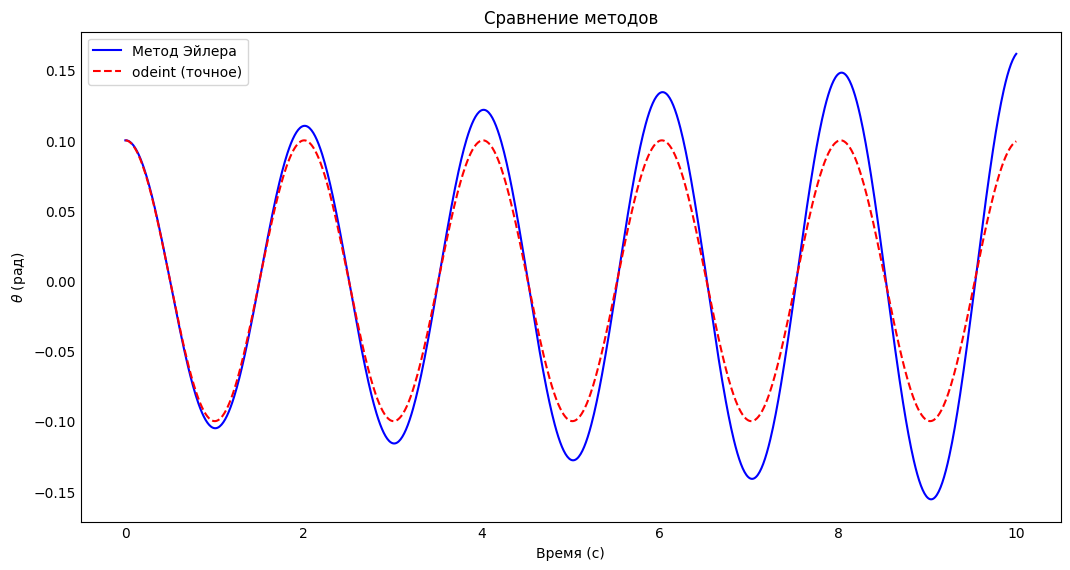

In [11]:
g = 9.81
l = 1.0
h = 0.01
t = np.arange(0, 10 + h, h)
y1 = np.zeros(len(t))  # Угол theta
y2 = np.zeros(len(t))  # Угловая скорость dtheta/dt

y1[0] = 0.1  # theta(0) = 0.1 рад
y2[0] = 0.0   # dtheta/dt(0) = 0

for i in range(1, len(t)): #решение эйлером
    y1[i] = y1[i-1] + h * y2[i-1]
    y2[i] = y2[i-1] + h * (-g/l * np.sin(y1[i-1]))

def pendulum(y, t, g, l):
    theta, omega = y
    dydt = [omega, -g/l * np.sin(theta)]
    return dydt


y0 = [0.1, 0.0]  # Начальные условия
sol = odeint(pendulum, y0, t, args=(g, l)) # через scipy

# График сравнения
plt.figure(figsize=(10, 5))
plt.plot(t, y1, 'b-', label='Метод Эйлера')
plt.plot(t, sol[:, 0], 'r--', label='odeint (точное)')
plt.xlabel('Время (с)')
plt.ylabel('$\\theta$ (рад)')
plt.title('Сравнение методов')
plt.grid()
plt.legend()
plt.show()

## 5. Выводы о проделанной работе

- были освоены функции библиотек matplotlib и scipy
- были решены дифференциальные уравнения - произвольное и описывающее физ. модель